In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
!pip install scikit-posthocs

In [23]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/PythonPart/datasetWithClusterLabels.csv",index_col=0)
unique = np.unique(df['Cluster label'])
print(unique)
print(df.head())
print(df.shape)

[1 2 3]
   index   age  gender  education  marital    income  phq_1  phq_2  phq_3  \
0      0  42.0       1        5.0        1  0.173913      0    0.0    1.0   
1      1  51.0       3       18.0        1  0.282609      0    0.0    0.0   
2      2  40.0       0        8.0        1  0.000000      0    0.0    0.0   
3      3  19.0       0       25.0        5  0.456522      2    1.0    0.0   
4      4  42.0       2       13.0        1  0.652174      0    1.0    0.0   

   phq_4  ...  ccs_9  ccs_10  ccs_11  ccs_12  PHQ_sum  GAD_sum  EHEALS_sum  \
0      0  ...      0       0       3       1      2.0      0.0        17.0   
1      0  ...      4       0       3       6      0.0      3.0        25.0   
2      0  ...      2       1       6       3      1.0      4.0        20.0   
3      0  ...      1       1       0       4      5.0     19.0        40.0   
4      0  ...      1       0       5       4      7.0      6.0        29.0   

   HEALS_sum  CCS_sum  Cluster label  
0        8.0     33.0

In [4]:
cluster1 = df.loc[(df['Cluster label'] == 1)]
cluster2 = df.loc[(df['Cluster label'] == 2)]
cluster3 = df.loc[(df['Cluster label'] == 3)]

print("Cluster 1 shape: ,", cluster1.shape)
print("Cluster 2 shape: ,", cluster2.shape)
print("Cluster 3 shape: ,", cluster3.shape)

clusters = [cluster1, cluster2, cluster3]


Cluster 1 shape: , (50, 62)
Cluster 2 shape: , (50, 62)
Cluster 3 shape: , (50, 62)


**AGE**

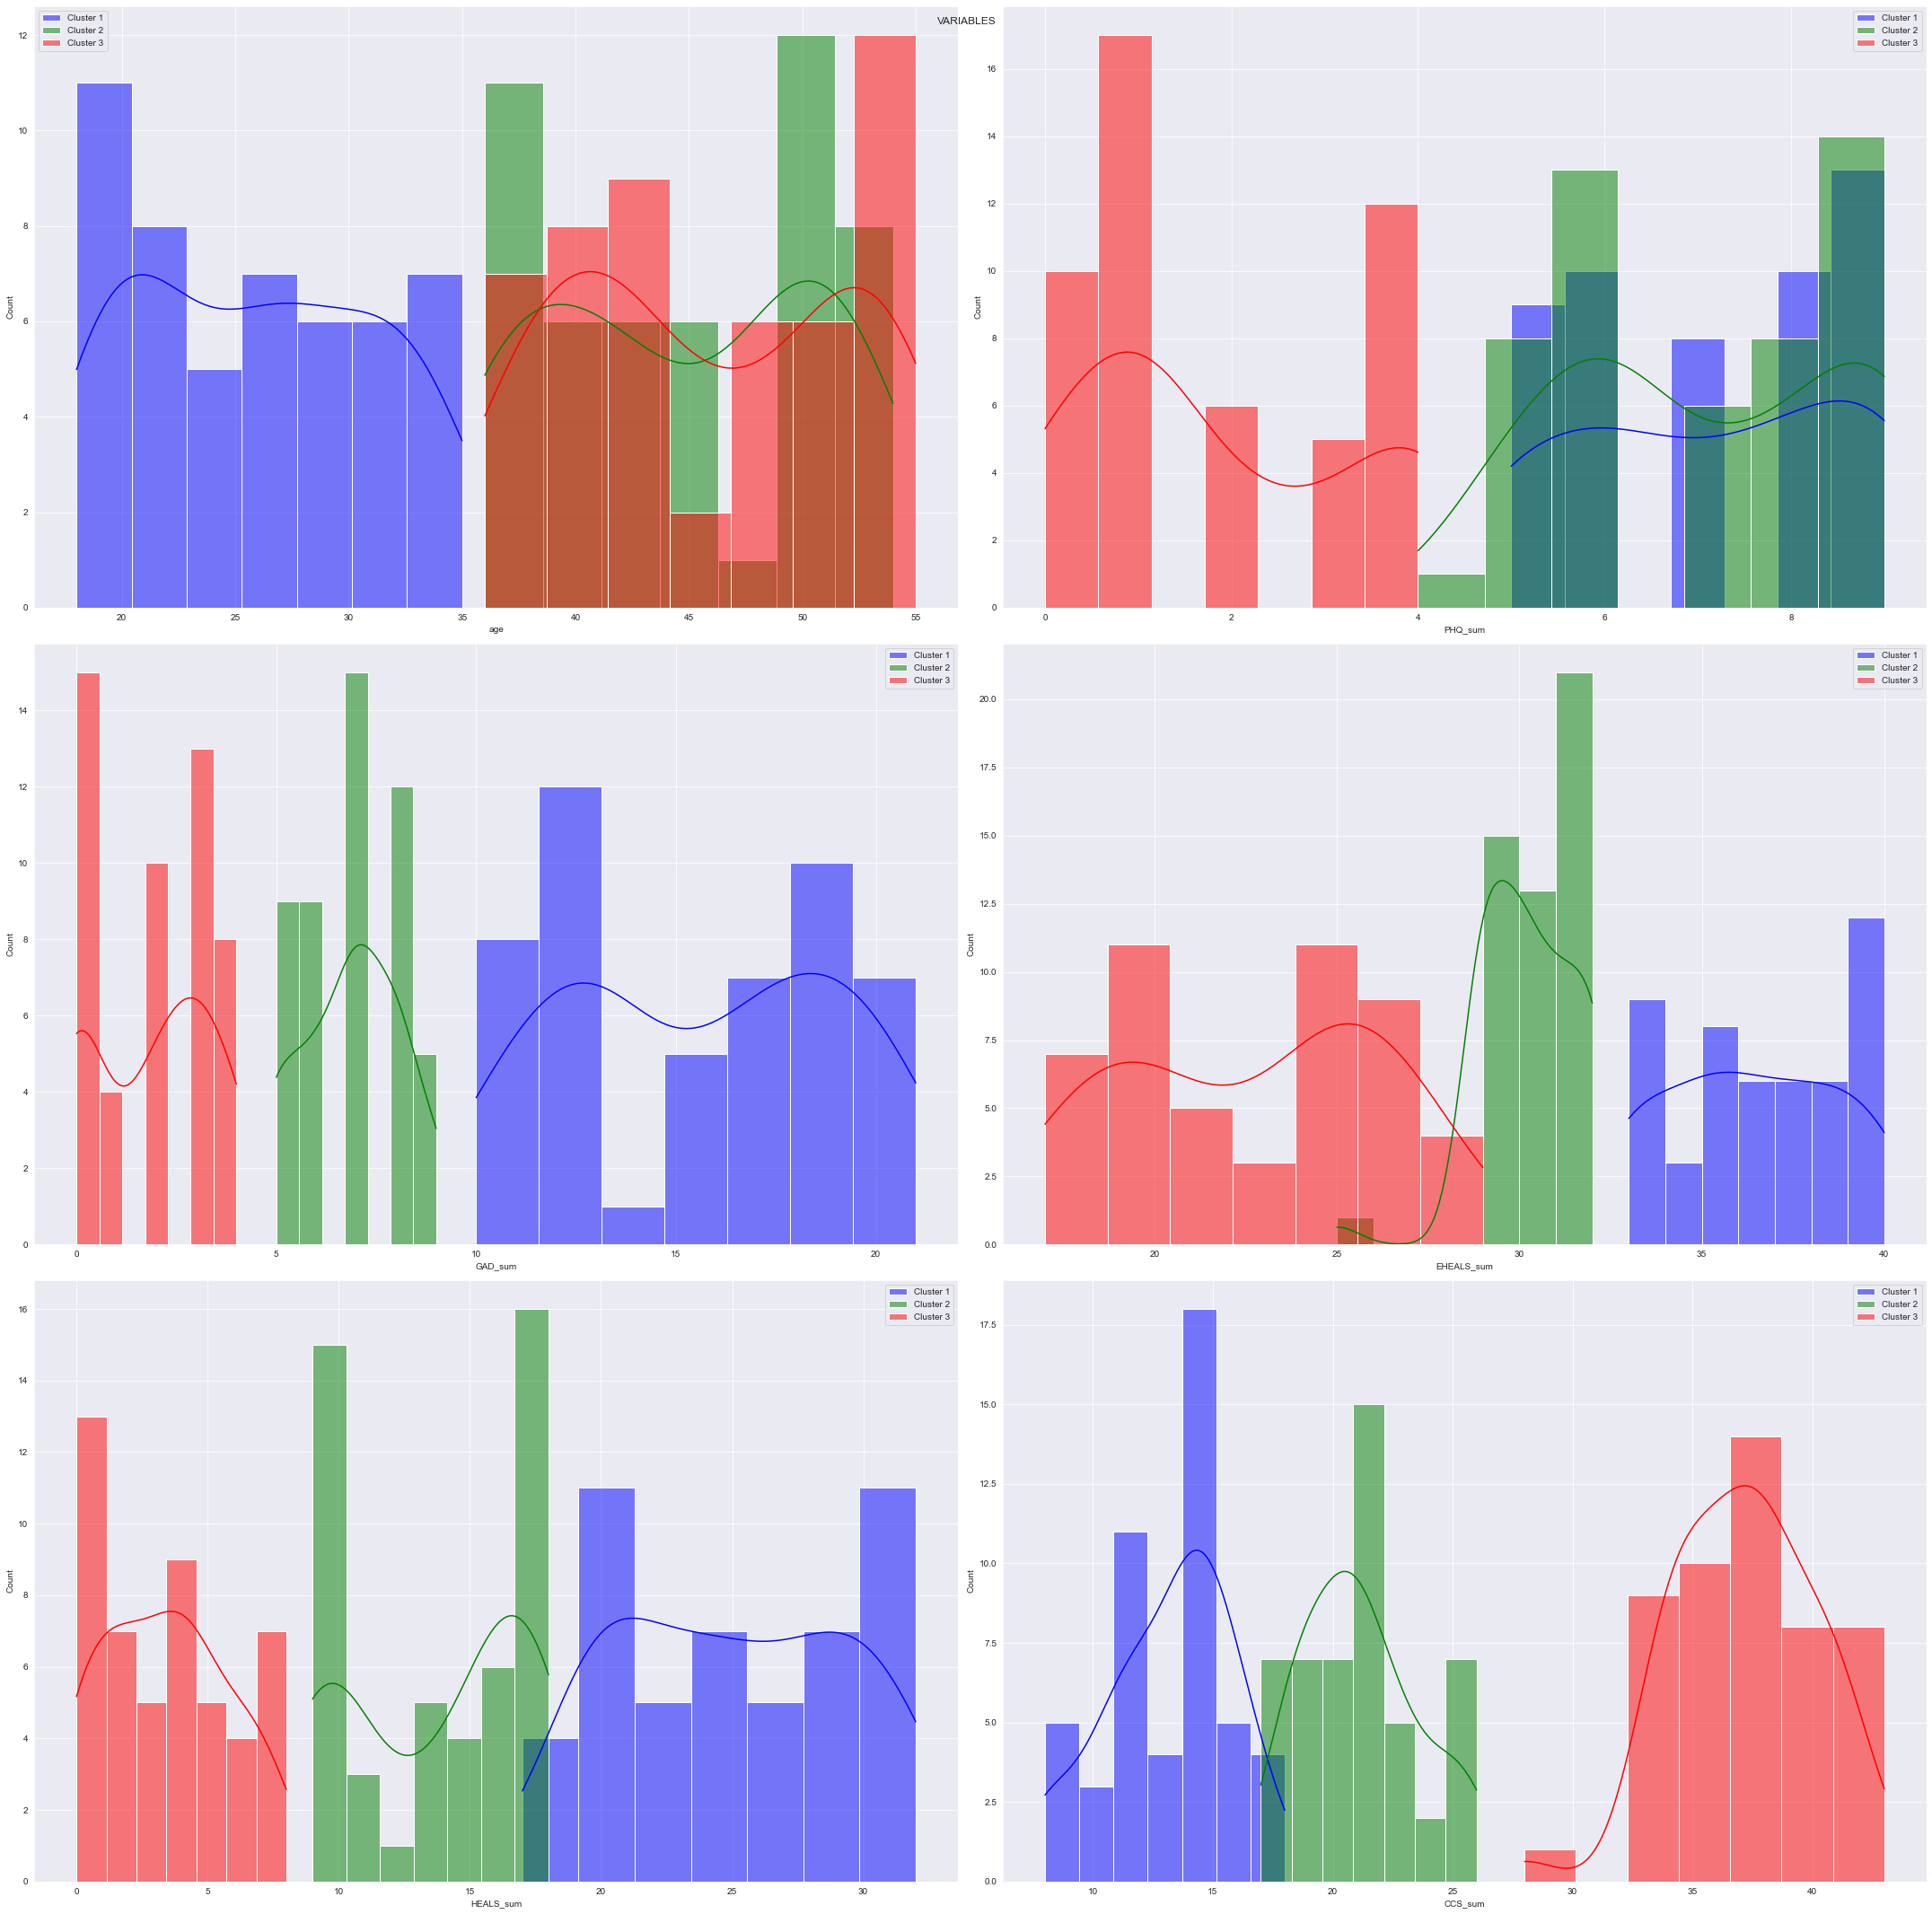

In [5]:
questionnaire_columns = ['age','PHQ_sum', 'GAD_sum', 'EHEALS_sum', 'HEALS_sum', 'CCS_sum']

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 30))
axes = axes.flatten()

for i, column_name in enumerate(questionnaire_columns):
    sns.histplot(data=cluster1[column_name],ax=axes[i],color='blue', label='Cluster 1', kde=True)
    sns.histplot(data=cluster2[column_name],ax=axes[i], color='green', label='Cluster 2', kde=True)
    sns.histplot(data=cluster3[column_name],ax=axes[i], color='red', label='Cluster 3', kde=True)
    axes[i].legend()
   
plt.suptitle('VARIABLES')
plt.tight_layout()
plt.show()


## Statistical Tests 

### Age 

In [15]:
import scikit_posthocs as sp

## Age 
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['age']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['age']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['age']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)


Kruskal-Wallis Test Statistic: 99.93944321279822
P-value: 1.988042406948483e-22

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.980837e-16  8.792652e-19
Cluster 2  2.980837e-16  1.000000e+00  1.000000e+00
Cluster 3  8.792652e-19  1.000000e+00  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 2
-> Cluster 1 and Cluster 3

No statistical difference is present between: 
-> Cluster 2 and Cluster 3

### PHQ_sum

In [14]:
## PHQ_sum 
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['PHQ_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['PHQ_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['PHQ_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)


Kruskal-Wallis Test Statistic: 100.48023687752354
P-value: 1.5170286817969992e-22

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  1.000000e+00  6.160158e-18
Cluster 2  1.000000e+00  1.000000e+00  2.273128e-17
Cluster 3  6.160158e-18  2.273128e-17  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3

No statistical difference is present between: 
-> Cluster 1 and Cluster 2

### GAD_sum

In [16]:
## GAD_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['GAD_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['GAD_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['GAD_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 133.07468615808912
P-value: 1.2682330313319507e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.407961e-08  2.612211e-30
Cluster 2  2.407961e-08  1.000000e+00  2.407961e-08
Cluster 3  2.612211e-30  2.407961e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 


### EHEALS_sum

In [17]:
## EHEALS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['EHEALS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['EHEALS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['EHEALS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 131.64600653081607
P-value: 2.590794100995198e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  1.750806e-08  5.390719e-30
Cluster 2  1.750806e-08  1.000000e+00  4.760459e-08
Cluster 3  5.390719e-30  4.760459e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

### HEALS_sum

In [18]:
## HEALS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['HEALS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['HEALS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['HEALS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 132.09744904337794
P-value: 2.0672995185036123e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  3.416688e-08  4.277710e-30
Cluster 2  3.416688e-08  1.000000e+00  2.179874e-08
Cluster 3  4.277710e-30  2.179874e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

### CCS_sum

In [19]:
## CCS_sum
## Creating a dataframe with two columns: 'Cluster' and 'Value' 
data_cluster1 = pd.DataFrame({'Cluster': 'Cluster 1', 'Value': cluster1['CCS_sum']})
data_cluster2 = pd.DataFrame({'Cluster': 'Cluster 2', 'Value': cluster2['CCS_sum']})
data_cluster3 = pd.DataFrame({'Cluster': 'Cluster 3', 'Value': cluster3['CCS_sum']})

data = pd.concat([data_cluster1, data_cluster2, data_cluster3])

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data_cluster1['Value'], data_cluster2['Value'], data_cluster3['Value'])

# Print the results
print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Perform Dunn's test for pairwise comparisons: bonferroni correction to the p-value 
posthoc_dunn = sp.posthoc_dunn(data, val_col='Value', group_col='Cluster', p_adjust='bonferroni')

# Print pairwise comparison results
print("\nPairwise Comparison Results:")
print(posthoc_dunn)

Kruskal-Wallis Test Statistic: 132.3909522842712
P-value: 1.785130558710753e-29

Pairwise Comparison Results:
              Cluster 1     Cluster 2     Cluster 3
Cluster 1  1.000000e+00  2.941866e-08  3.687117e-30
Cluster 2  2.941866e-08  1.000000e+00  2.349262e-08
Cluster 3  3.687117e-30  2.349262e-08  1.000000e+00


As we were expecting statistical difference is present between: 
-> Cluster 1 and Cluster 3
-> Cluster 2 and Cluster 3
-> Cluster 1 and Cluster 2

The p-values are very very low: significance is very high 

From here -> ignore

In [6]:

cluster1 = df.loc[(df['Cluster label'] == 1)]
cluster2 = df.loc[(df['Cluster label'] == 2)]
cluster3 = df.loc[(df['Cluster label'] == 3)]

[n_rowsCl1, n_columnsCl1] = cluster1.shape
[n_rowsCl2, n_columnsCl2] = cluster2.shape
[n_rowsCl3, n_columnsCl3] = cluster3.shape
obsCluster1 = cluster1.iloc[np.random.randint(0,len(cluster1),size=10),:]
obsCluster2 = cluster2.iloc[np.random.randint(0,len(cluster1),size=10),:]
obsCluster3 = cluster3.iloc[np.random.randint(0,len(cluster1),size=10),:]

In [7]:
obsCluster1

Unnamed: 0  index   age  gender  education  marital    income  phq_1  \
126         126    134  32.0       2       13.0        1  0.478261      2   
107         107    113  19.0       1       13.0        2  0.543478      0   
86           86     88  18.0       1       22.0        5  0.586957      1   
109         109    115  22.0       3       18.0        1  0.521739      0   
145         145    155  29.0       2       18.0        0  0.326087      0   
66           66     66  29.0       2       18.0        5  0.543478      0   
145         145    155  29.0       2       18.0        0  0.326087      0   
48           48     48  28.0       3       25.0        0  0.608696      0   
76           76     77  35.0       3        8.0        1  0.478261      2   
24           24     24  21.0       1       13.0        1  0.369565      0   

     phq_2  phq_3  ...  ccs_9  ccs_10  ccs_11  ccs_12  PHQ_sum  GAD_sum  \
126    0.0    1.0  ...      1       1       2       6      9.0     16.0   
107    0.0    2.0  ...      0       4       1       6      8.0     10.0   
86     0.0    2.0  ...      0       5       2       6      9.0     11.0   
109    1.0    2.0  ...      1       0       0       4      8.0     11.0   
145    2.0    0.0  ...      2       3       2       5      7.0     13.0   
66     2.0    2.0  ...      1       2       0       4      9.0     13.0   
145    2.0    0.0  ...      2       3       2       5      7.0     13.0   
48     0.0    2.0  ...      0       5       1       6      5.0     13.0   
76     1.0    1.0  ...      1       3       1       6      9.0     11.0   
24     2.0    0.0  ...      0       5       0       5      5.0     17.0   

     EHEALS_sum  HEALS_sum  CCS_sum  Cluster label  
126        35.0       30.0     11.0              1  
107        35.0       19.0     16.0              1  
86         35.0       24.0     14.0              1  
109        40.0       32.0     15.0              1  
145        38.0       30.0     16.0              1  
66         33.0       21.0     14.0              1  
145        38.0       30.0     16.0              1  
48         34.0       21.0     13.0              1  
76         37.0       20.0     14.0              1  
24         36.0       22.0     10.0              1  

[10 rows x 62 columns]

In [8]:
obsCluster2

Unnamed: 0  index   age  gender  education  marital    income  phq_1  \
34           34     34  37.0       0       13.0        1  0.630435      1   
26           26     26  51.0       3        8.0        1  0.434783      0   
4             4      4  42.0       2       13.0        1  0.652174      0   
18           18     18  50.0       1       13.0        1  0.413043      1   
18           18     18  50.0       1       13.0        1  0.413043      1   
79           79     80  49.0       2       13.0        1  0.434783      1   
131         131    139  42.0       2       13.0        1  0.652174      2   
137         137    145  36.0       0        8.0        1  0.608696      1   
56           56     56  39.0       1       13.0        0  0.326087      0   
105         105    111  45.0       3       18.0        1  0.500000      1   

     phq_2  phq_3  ...  ccs_9  ccs_10  ccs_11  ccs_12  PHQ_sum  GAD_sum  \
34     1.0    0.0  ...      5       3       0       6      9.0      8.0   
26     0.0    0.0  ...      5       0       3       6      6.0      5.0   
4      1.0    0.0  ...      1       0       5       4      7.0      6.0   
18     0.0    0.0  ...      0       1       0       6      5.0      8.0   
18     0.0    0.0  ...      0       1       0       6      5.0      8.0   
79     2.0    0.0  ...      0       0       4       6      9.0      7.0   
131    0.0    0.0  ...      3       3       3       6      7.0      5.0   
137    0.0    0.0  ...      2       4       2       5      5.0      7.0   
56     2.0    2.0  ...      3       2       5       5      9.0      7.0   
105    0.0    2.0  ...      1       6       0       6      9.0      5.0   

     EHEALS_sum  HEALS_sum  CCS_sum  Cluster label  
34         29.0       15.0     23.0              2  
26         30.0       18.0     20.0              2  
4          29.0       16.0     22.0              2  
18         31.0       16.0     26.0              2  
18         31.0       16.0     26.0              2  
79         29.0       12.0     17.0              2  
131        30.0       17.0     18.0              2  
137        29.0        9.0     19.0              2  
56         32.0       17.0     19.0              2  
105        32.0       17.0     21.0              2  

[10 rows x 62 columns]

In [9]:
obsCluster3

Unnamed: 0  index   age  gender  education  marital    income  phq_1  \
1             1      1  51.0       3       18.0        1  0.282609      0   
30           30     30  54.0       1        8.0        2  0.269565      0   
7             7      7  55.0       2        8.0        2  0.391304      0   
144         144    154  53.0       2        8.0        1  0.065217      0   
45           45     45  36.0       1       18.0        4  0.195652      0   
70           70     70  51.0       0        8.0        2  0.117370      0   
84           84     85  42.0       1       13.0        2  0.543478      0   
125         125    133  48.0       3       13.0        1  0.239130      0   
39           39     39  42.0       3        8.0        4  0.065217      0   
68           68     68  47.0       3        8.0        3  0.130435      0   

     phq_2  phq_3  ...  ccs_9  ccs_10  ccs_11  ccs_12  PHQ_sum  GAD_sum  \
1      0.0    0.0  ...      4       0       3       6      0.0      3.0   
30     1.0    0.0  ...      0       1       5       2      2.0      0.0   
7      0.0    0.0  ...      6       1       0       6      0.0      0.0   
144    0.0    1.0  ...      2       0       3       0      1.0      3.0   
45     0.0    0.0  ...      1       0       3       1      1.0      0.0   
70     0.0    0.0  ...      2       0       3       0      4.0      4.0   
84     0.0    0.0  ...      6       2       6       0      0.0      2.0   
125    1.0    1.0  ...      6       6       4       5      3.0      1.0   
39     0.0    0.0  ...      1       1       6       3      0.0      3.0   
68     0.0    0.0  ...      3       1       0       1      0.0      1.0   

     EHEALS_sum  HEALS_sum  CCS_sum  Cluster label  
1          25.0        7.0     36.0              3  
30         24.0        2.0     40.0              3  
7          19.0        5.0     35.0              3  
144        27.0        3.0     41.0              3  
45         20.0        7.0     41.0              3  
70         26.0        0.0     35.0              3  
84         28.0        1.0     40.0              3  
125        19.0        1.0     38.0              3  
39         19.0        1.0     35.0              3  
68         25.0        4.0     39.0              3  

[10 rows x 62 columns]